# Decision trees

![img](https://pbs.twimg.com/media/B13n2VVCIAA0hJS.jpg)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's generate a toy dataset:

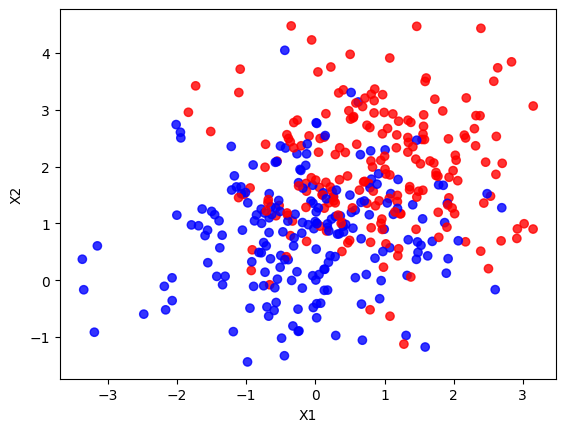

In [2]:
from sklearn.datasets import make_blobs

X_toy, y_toy = make_blobs(n_samples=400,
                          centers=[[0., 1.], [1., 2.]],
                          random_state=14)

plt.scatter(X_toy[:, 0], X_toy[:, 1], c=y_toy, alpha=0.8, cmap='bwr')
plt.xlabel('X1'), plt.ylabel('X2');

## Decision trees out of the box

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

DecisionTreeClassifier has a number of parameters:
* `max_depth` – a limit on tree depth (default – no limit)
* `min_samples_split` – there should be at least this many samples to split further (default – 2)
* `min_samples_leaf` – there should be at least this many samples on one side of a split to consider it valid (default – 1).
* `criterion` – 'gini' or 'entropy' – split stuff over this parameter (default : gini)

In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_toy, y_toy)

DecisionTreeClassifier()

### Plot decision surface

You may also check [sklearn.inspection.DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html).

Let's plot the tree we've fitted above:

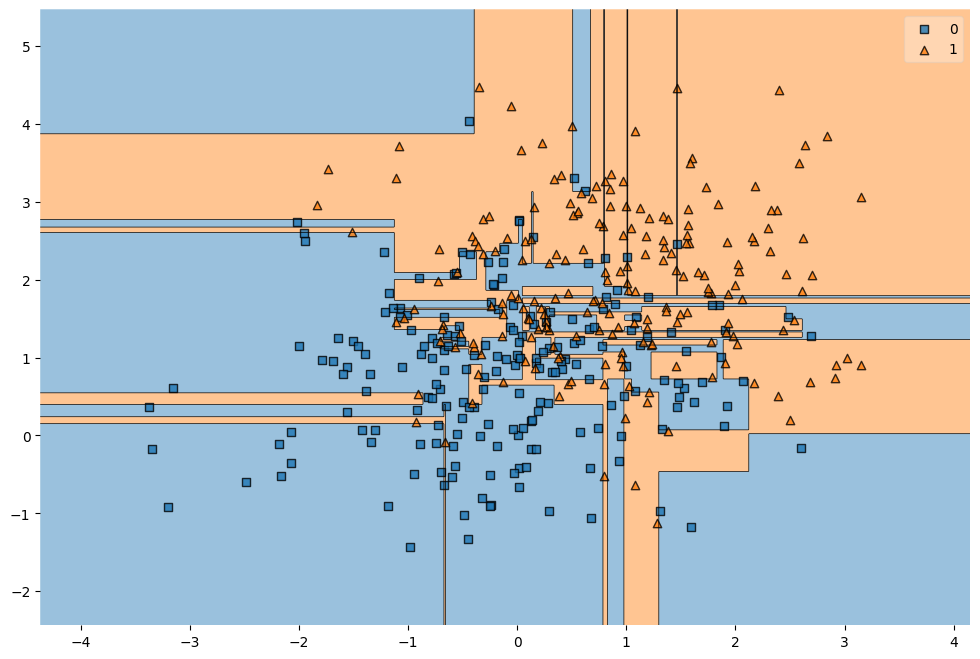

In [15]:
plt.figure(figsize=(12, 8))
plot_decision_regions(X_toy, y_toy, clf);

### Tree depth

First we are going to split our data to train and test subsets:

In [11]:
X_toy_train, X_toy_test, y_toy_train, y_toy_test = \
    train_test_split(X_toy, y_toy, test_size=0.25)

Let's investigate how the decision boundary depends on the tree depth. Maximum tree depth is defined by the `max_depth` parameter: depict   decision boundary plots for both train and test datasets (separately).


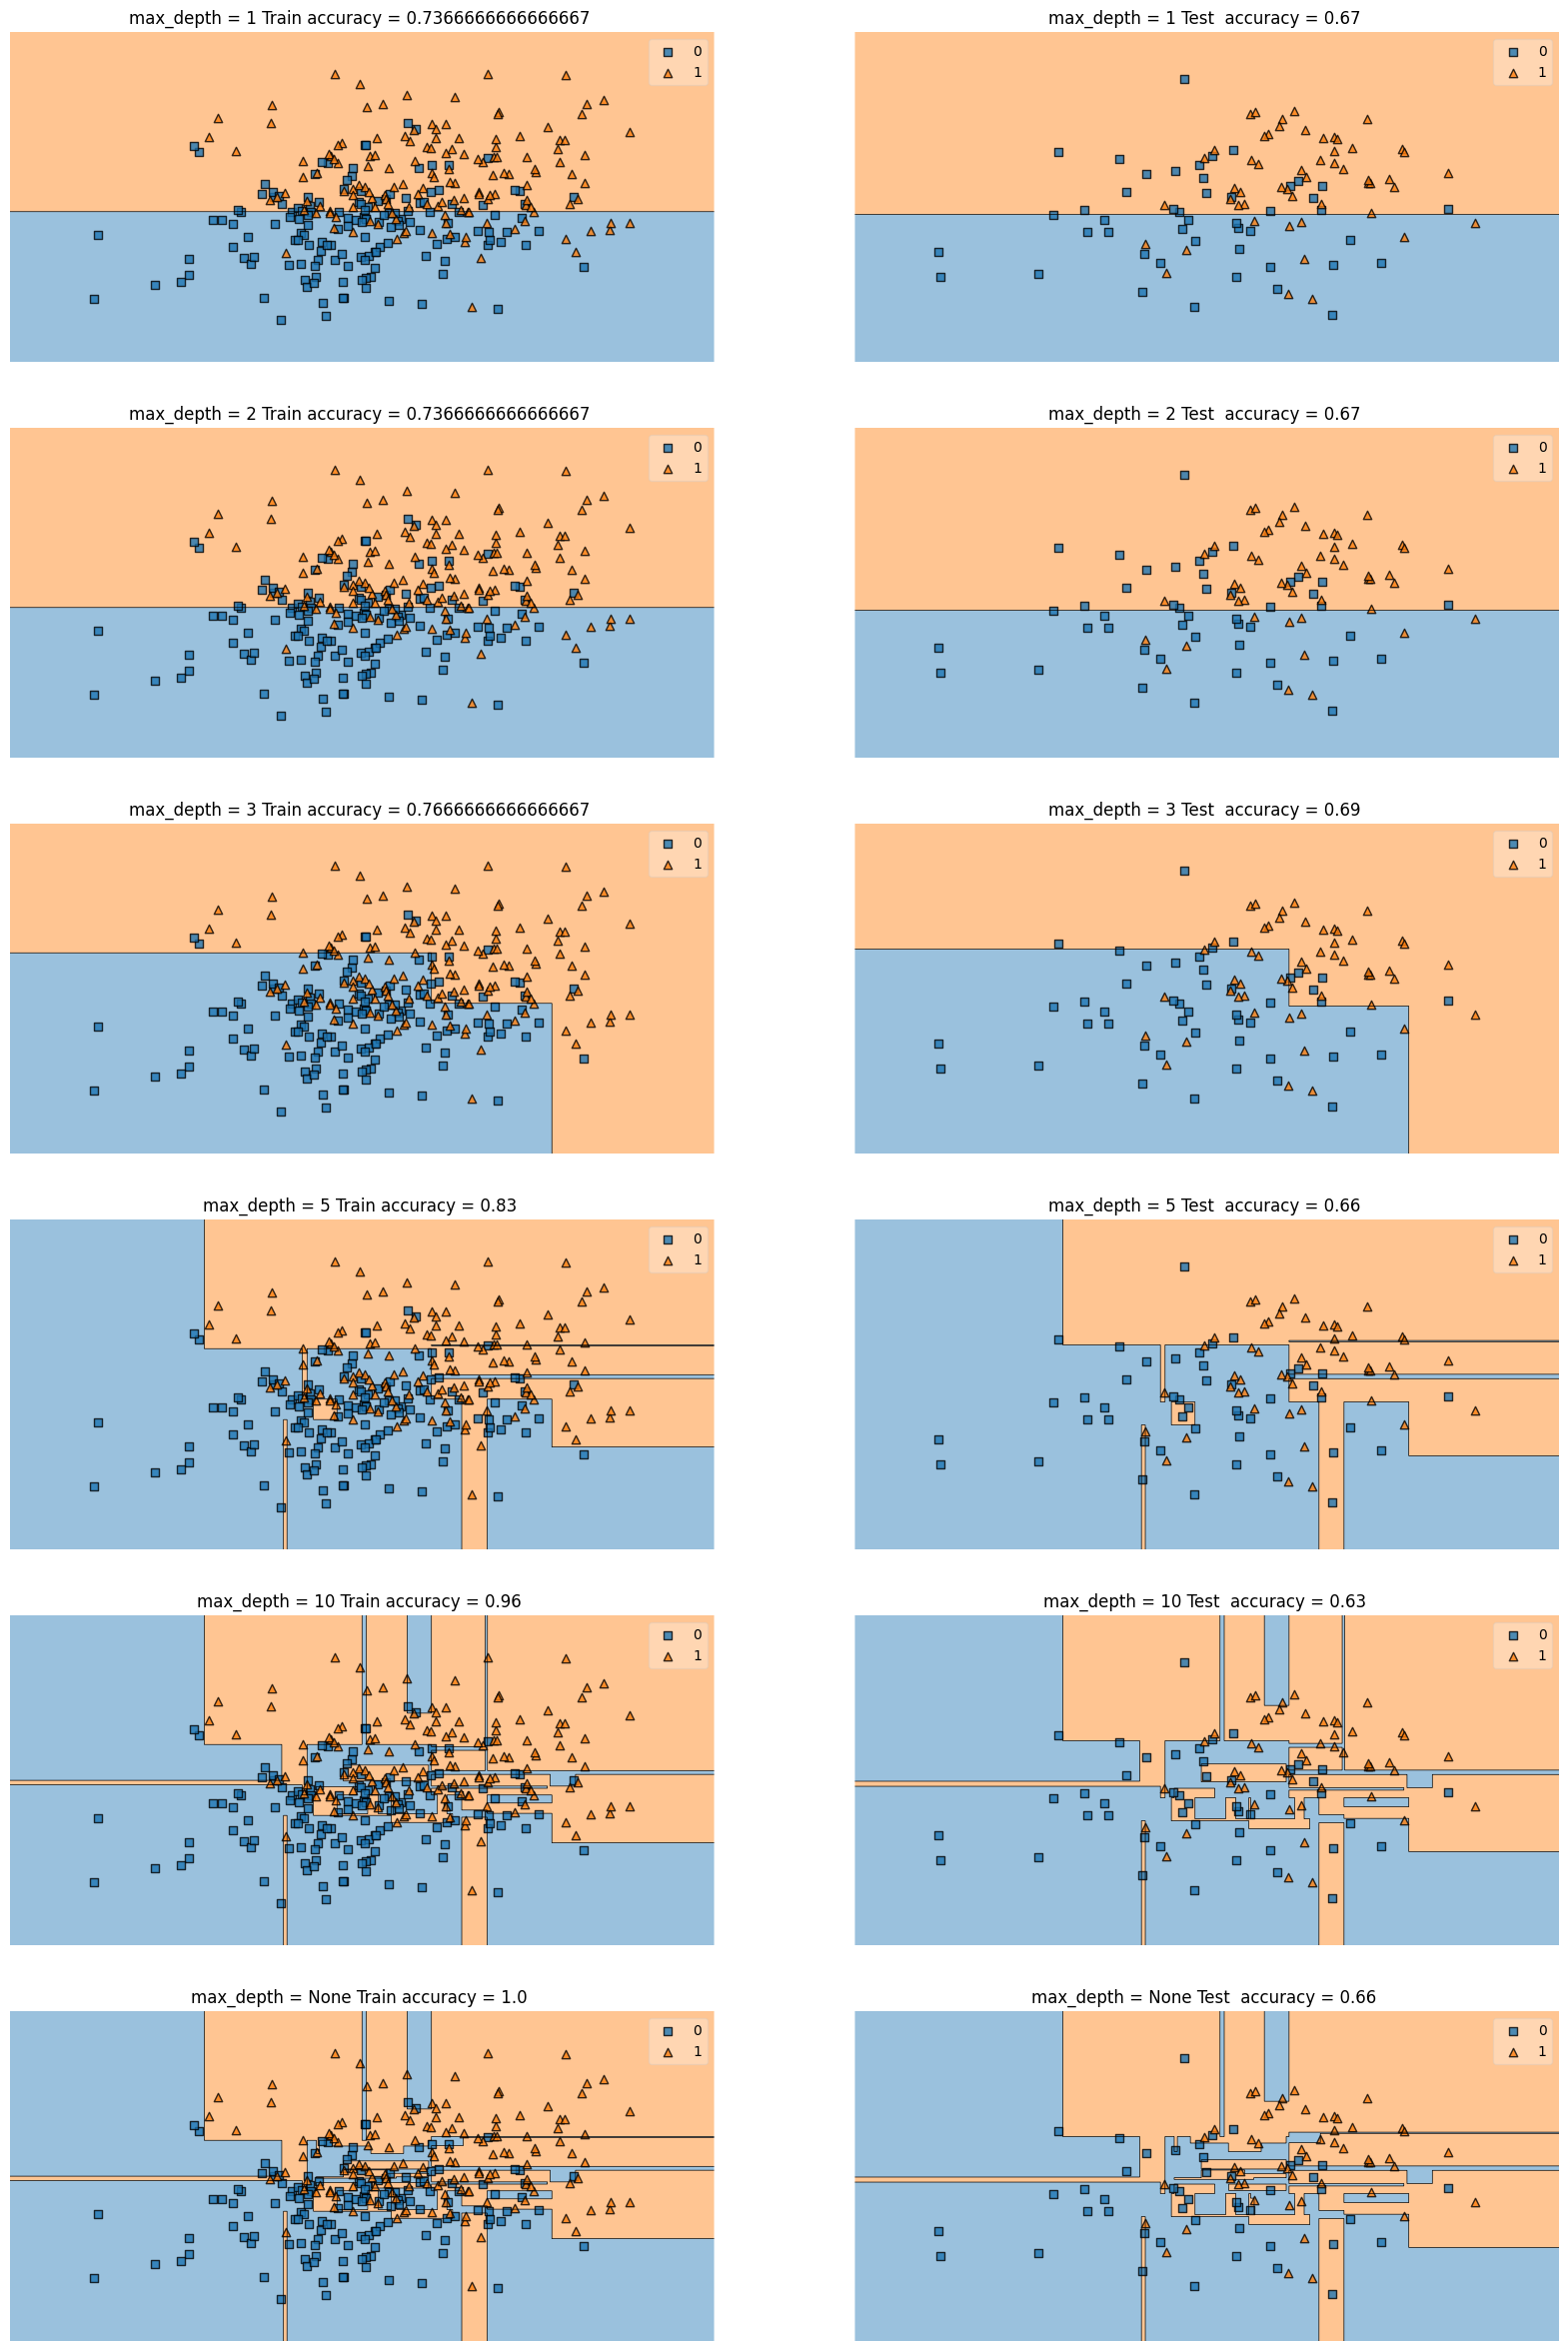

In [24]:
depth_values = [1, 2, 3, 5, 10, None]

fig, axs = plt.subplots(ncols = 2, nrows = len(depth_values), figsize=(20, 30))


for i in range(len(depth_values)):
  max_depth = depth_values[i]

  dt = DecisionTreeClassifier(max_depth=max_depth, random_state=13)
  dt.fit(X_toy_train, y_toy_train)


  axs[i][0].set_title(
            "max_depth = {} Train accuracy = {} ".format(max_depth, accuracy_score(y_toy_train, dt.predict(X_toy_train)))
        )
  axs[i][0].axis("off")
  axs[i][1].set_title(
            "max_depth = {} Test  accuracy = {} ".format(max_depth, accuracy_score(y_toy_test, dt.predict(X_toy_test)))
        )
  axs[i][1].axis("off")
  plot_decision_regions(X_toy_train, y_toy_train, dt, ax=axs[i][0])
  plot_decision_regions(X_toy_test,  y_toy_test,  dt, ax=axs[i][1])

plt.show()


### Overfitting

Trees seem to overfit. Let's conduct an experiment: choose random 90\% of the sample and fit the tree. And check if they differ.

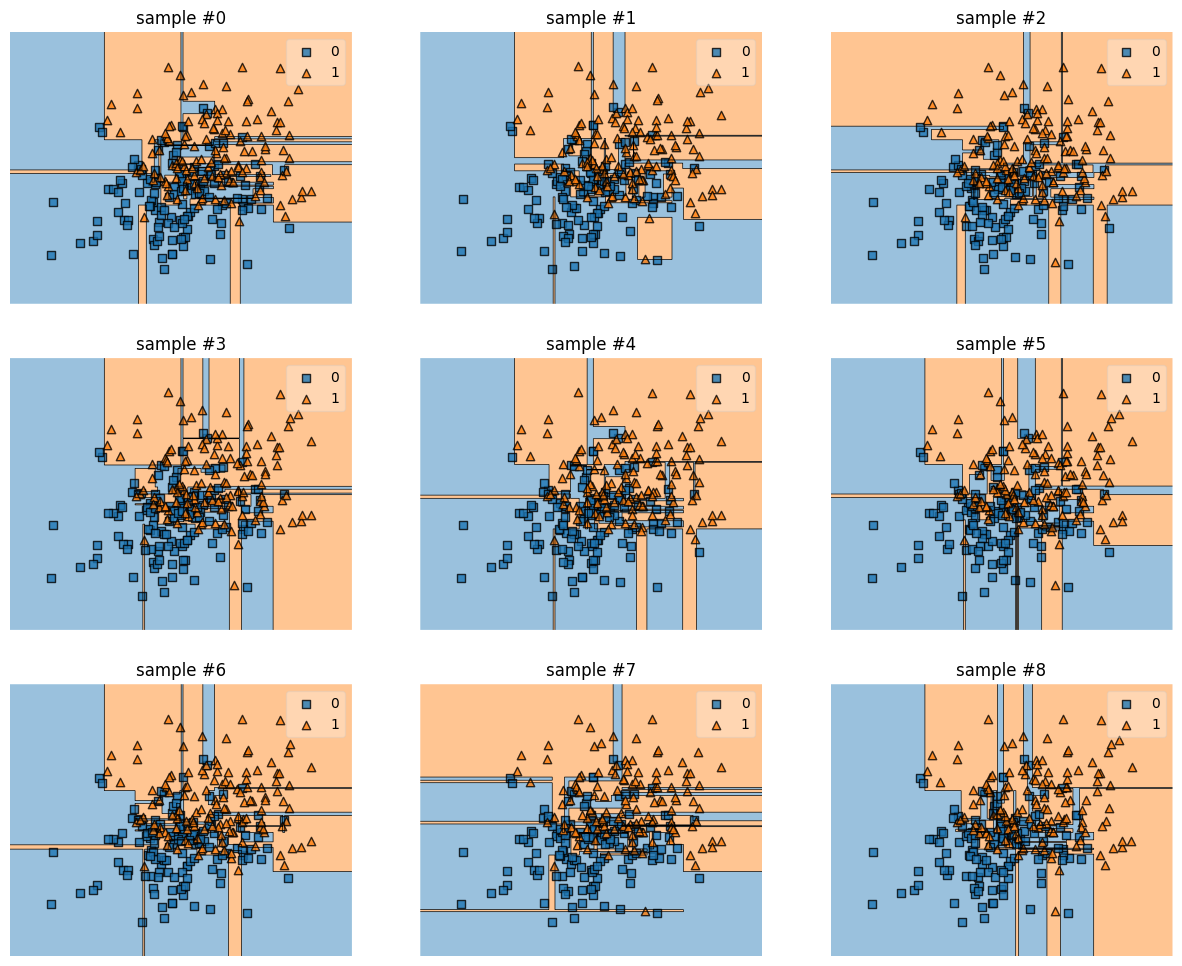

In [44]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=13)
        idx_part = np.random.choice(len(X_toy_train), replace=False, size=int(0.9 * len(X_toy_train)))
        X_part, y_part = X_toy_train[idx_part, :], y_toy_train[idx_part]
        dt.fit(X_part, y_part)
        ax[i][j].set_title("sample #{}".format(seed_idx))
        ax[i][j].axis("off")
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])

plt.show()

### Toy multiclass data

Now let's try out a multiclass classification case:

In [27]:
!wget https://raw.githubusercontent.com/Majid-Sohrabi/MLDM-2024/main/07-trees/data.npz

--2024-11-12 19:01:38--  https://raw.githubusercontent.com/Majid-Sohrabi/MLDM-2024/main/07-trees/data.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108474 (106K) [application/octet-stream]
Saving to: ‘data.npz’

data.npz            100%[===================>] 105.93K  --.-KB/s    in 0.02s   

2024-11-12 19:01:38 (6.71 MB/s) - ‘data.npz’ saved [108474/108474]



Firstly, we'll load the data:

In [28]:
data = np.load('data.npz')
X, y = data["X"], data["y"]

print(X.shape, y.shape)

(4505, 2) (4505,)


And then split it to train and test:

In [29]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, random_state=1337)

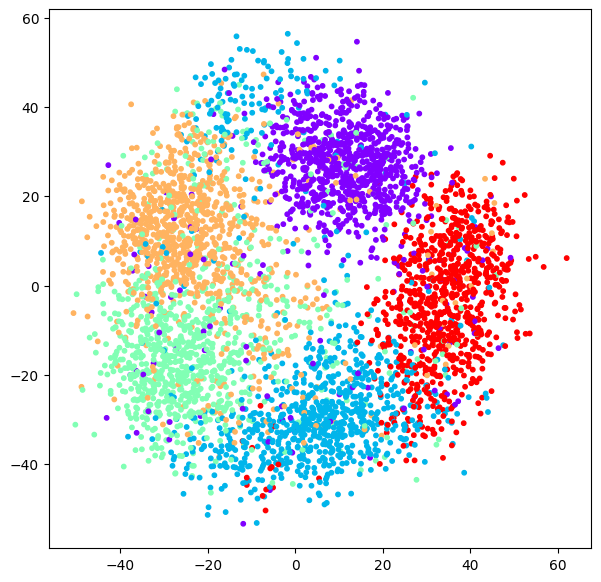

In [30]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s = 10)

Now that we've had a look at the data, let's fit a decision tree on it:

In [31]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
print('Train accuracy = ', accuracy_score(y_train, clf.predict(X_train)))
print('Test  accuracy = ', accuracy_score(y_test, clf.predict(X_test)))

Train accuracy =  1.0
Test  accuracy =  0.7070572569906791


and plot the result:

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


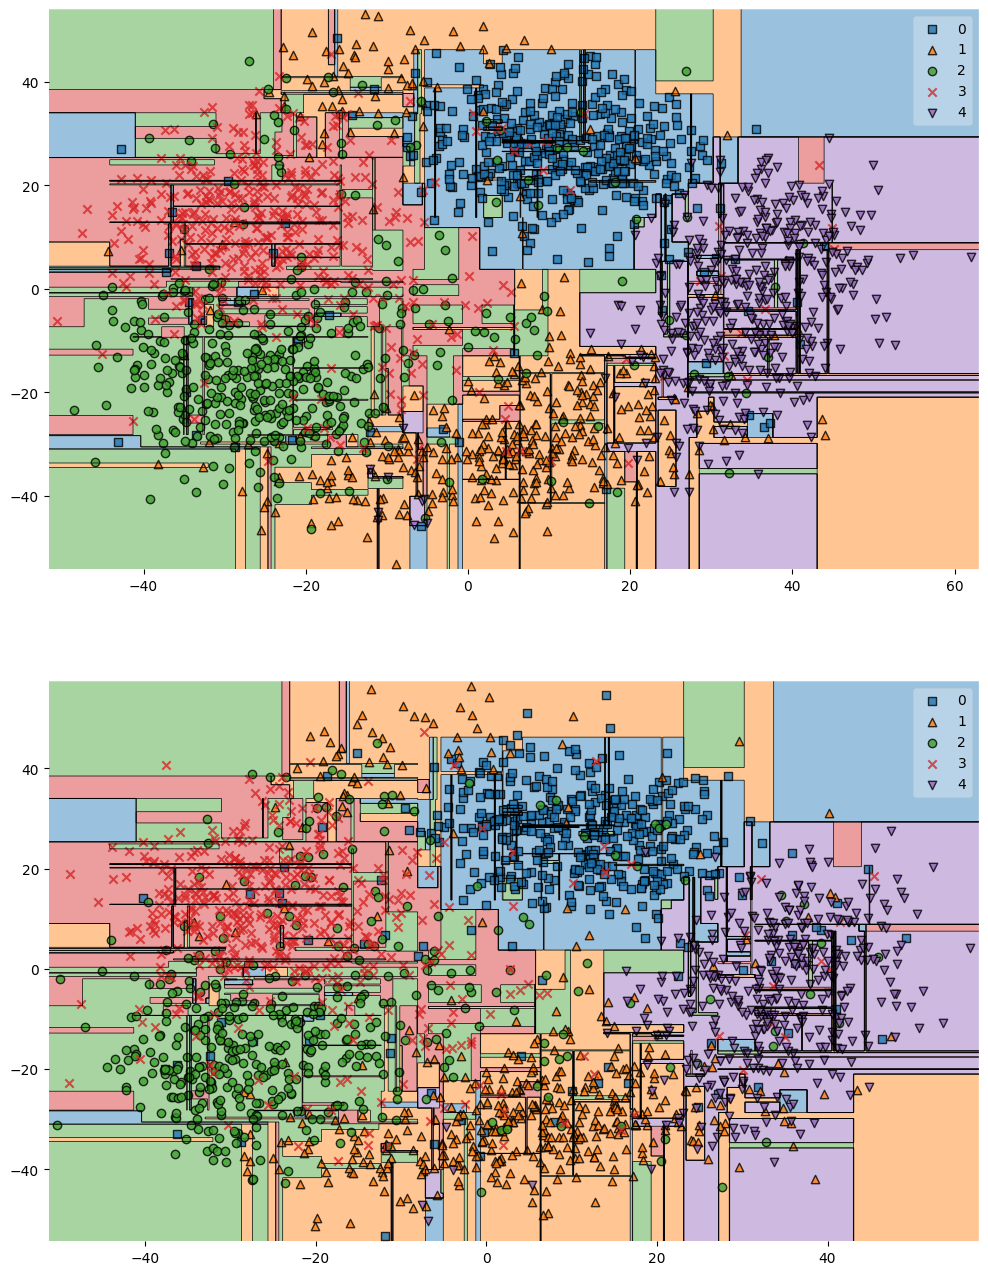

In [40]:
plt.figure(figsize=(12, 16))
plt.subplot(2, 1, 1)
plot_decision_regions(X_train, y_train, clf)
plt.subplot(2, 1, 2)
plot_decision_regions(X_test, y_test, clf);

#### We need a better tree!

Try adjusting the parameters of DecisionTreeClassifier to improve the test accuracy.
 * Accuracy >= 0.72 - not bad for a start
 * Accuracy >= 0.75 - better, but not enough
 * Accuracy >= 0.77 - pretty good
 * Accuracy >= 0.78 - great! (probably the best result for a single tree) **(1 point)**

Feel free to modify the DecisionTreeClassifier above instead of re-writing everything.

**Note:** some of the parameters you can tune are under the "Decision trees out of the box" header.

## Feature transformations
Try adding feature transformations using a pipeline and a transformation, e.g. function transformer.

```python
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

clf = make_pipeline(
    FunctionTransformer(lambda X: np.concatenate([X, X**2], axis=1)),
    DecisionTreeClassifier()
)
```

Which transformations should improve the score? **(1 point)**

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

clf = make_pipeline(
FunctionTransformer(lambda X: X),
DecisionTreeClassifier(random_state=42)
)

clf.fit(X_train, y_train)

print('Train accuracy = ', accuracy_score(y_train, clf.predict(X_train)))
print('Test  accuracy = ', accuracy_score(y_test, clf.predict(X_test)))



plt.figure(figsize=(12, 16))
plt.subplot(2, 1, 1)
plot_decision_regions(X_train, y_train, clf)
plt.subplot(2, 1, 2)
plot_decision_regions(X_test, y_test, clf)

```
```
```
```

We've talked a lot about the importance of feature scaling. Why aren't we doing it here?

Let's try adding a standard scaler to the pipeline of our model and check how it affects the result. Can you explain the result?

In [41]:
from sklearn.preprocessing import StandardScaler

In [46]:
clf = DecisionTreeClassifier(max_depth = 3, min_samples_split=6)
clf.fit(X_train, y_train)

print('No scaling')
print('Train accuracy = ', accuracy_score(y_train, clf.predict(X_train)))
print('Test  accuracy = ', accuracy_score(y_test, clf.predict(X_test)))

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
clf.fit(X_train_scaled, y_train)

print('With scaling')
print('Train accuracy = ', accuracy_score(y_train, clf.predict(X_train_scaled)))
print('Test  accuracy = ', accuracy_score(y_test, clf.predict(X_test_scaled)))

No scaling
Train accuracy =  0.7855239786856127
Test  accuracy =  0.7514425210830005
With scaling
Train accuracy =  0.7855239786856127
Test  accuracy =  0.7514425210830005


## Visualizing a tree

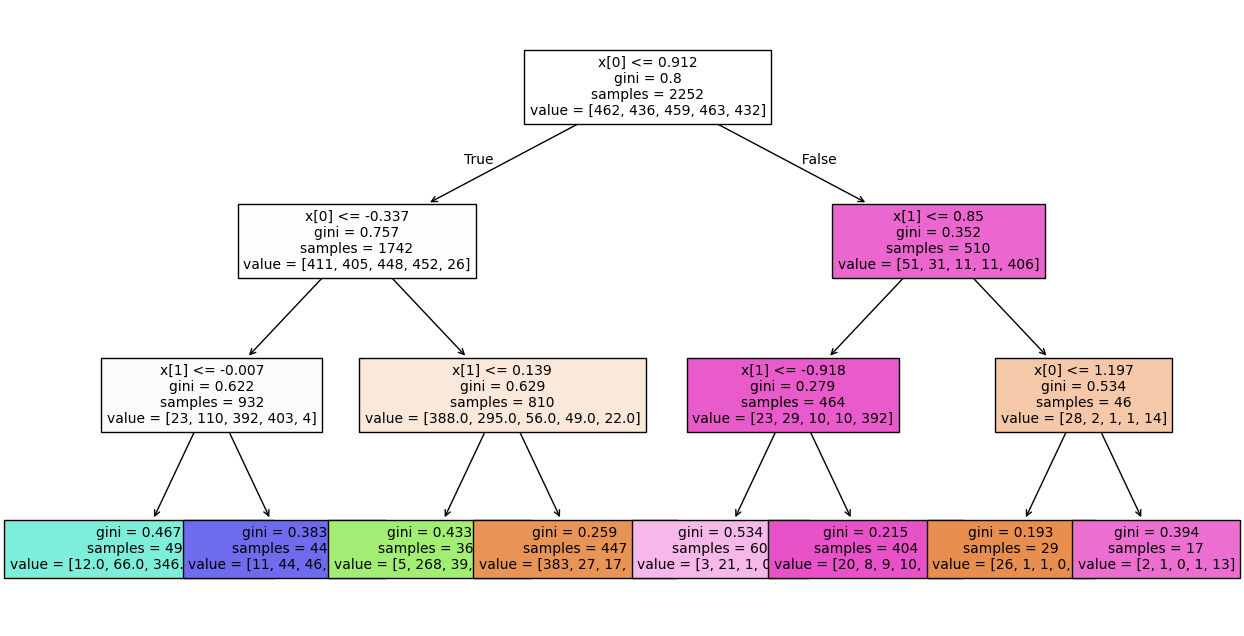

In [49]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 8), dpi=100)
plot_tree(clf, fontsize=10, filled=True);

## Bonus. Tree pruning (Minimal Cost-Complexity)

**(3 bonus points)**

Let tree $T$ have the total weighted sample impurity of the terminal nodes $R(T)$.

Can prune the tree by minimizing:
$$R_\alpha(T) = R(T) + \alpha\left|T\right|,$$
where $\alpha\geq0$, and $\left|T\right|$ is the number of terminal nodes in the tree.

Let $T_t$ be the subtree tree whose root node is $t\in T$.

$T_t$ will be pruned out (i.e. replaced with $t$ as the terminal node) if:
$$R(t)+\alpha < R(T_t)+\alpha\left|T_t\right|$$
or in other words if:
$$\alpha > \alpha_{eff}(t)=\frac{R(t) - R(T_t)}{\left|T_t\right|-1}$$

One can use the `cost_complexity_pruning_path` method of `DecisionTreeClassifier` to get the list of $\alpha_{eff}$.

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

path = clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set");

Your turn! `DecisionTreeClassifier` has a `ccp_alpha` parameter to prune the tree.

 For each of the `ccp_alphas` defined above fit a tree, and then make 3 plots:
 - tree depth vs alpha
 - number of nodes in the tree vs alpha
 - train and test accuracies vs alpha

You can get the tree depth with `clf.tree_.max_depth`, and number of nodes with `clf.tree_.node_count`.

In [ ]:
tree_depth = []
number_of_nodes = []
train_acc = []
test_acc = []
for alpha in ccp_alphas:
# YOUR CODE <>

## Decision trees vs linear models

This data is easy for linear models, but hard for trees.

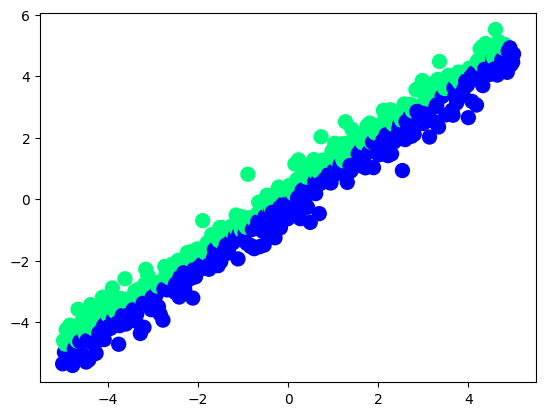

In [69]:
np.random.seed(13)
n = 500
X = np.zeros(shape=(n, 2))
X[:, 0] = np.linspace(-5, 5, 500)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="winter");

Linear model accuracy: 0.99


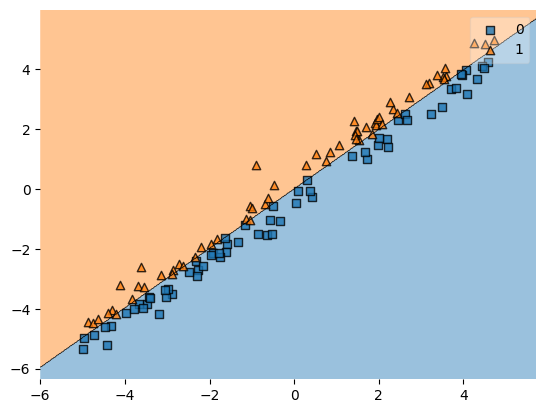

In [70]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=13
)

lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_lr, y_test):.2f}")

plot_decision_regions(X_test, y_test, lr);

Decision tree accuracy: 0.86


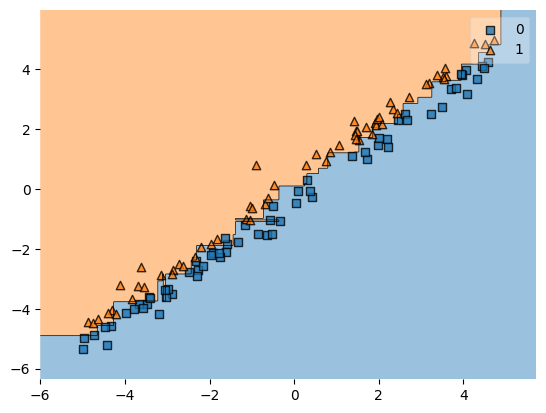

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Decision tree accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

plot_decision_regions(X_test, y_test, dt);

This data is hard for linear models, but easy for trees.

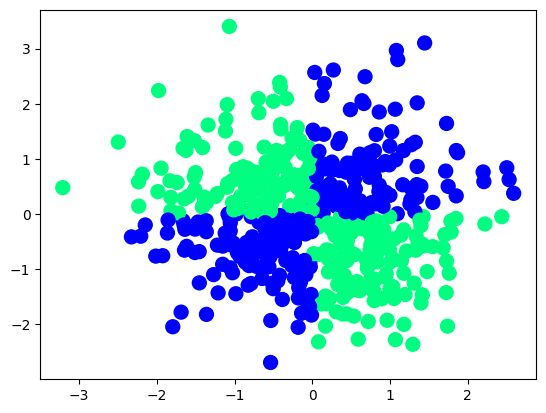

In [72]:
np.random.seed(13)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="winter");

Linear model accuracy: 0.39


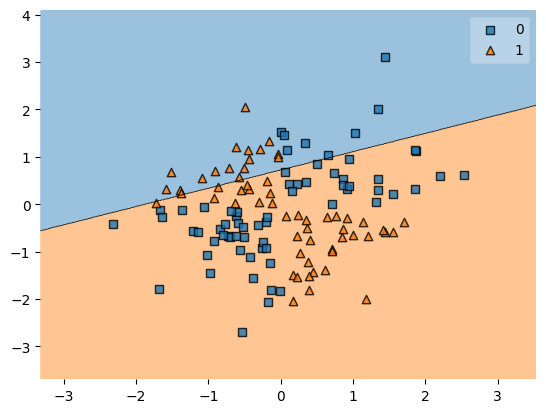

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=13
)

lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_lr, y_test):.2f}")

plot_decision_regions(X_test, y_test, lr);

Decision tree accuracy: 0.97


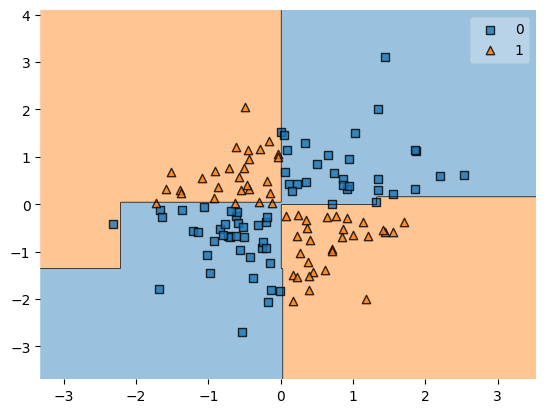

In [74]:
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Decision tree accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

plot_decision_regions(X_test, y_test, dt);

## Decision tree for regression

In [55]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  mean_squared_error

import pandas as pd

california = fetch_california_housing()
california_X = pd.DataFrame(data=california.data, columns=california.feature_names)
california_Y = california.target
print(f"X shape: {california_X.shape}, Y shape: {california_Y.shape}")
california_X.head()

X shape: (20640, 8), Y shape: (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


0.6352419064695592


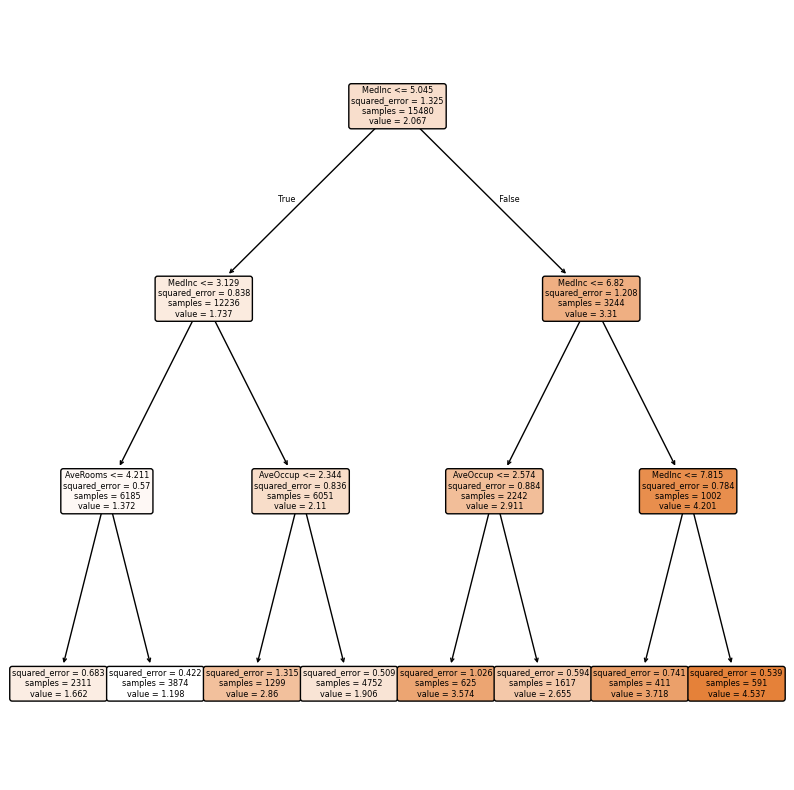

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    california_X, california_Y, test_size=0.25, random_state=13
)

dt = DecisionTreeRegressor(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

print(mean_squared_error(y_test, dt.predict(X_test)))

plt.figure(figsize=(10, 10))
plot_tree(dt, feature_names=california_X.columns, filled=True, rounded=True)
plt.show()

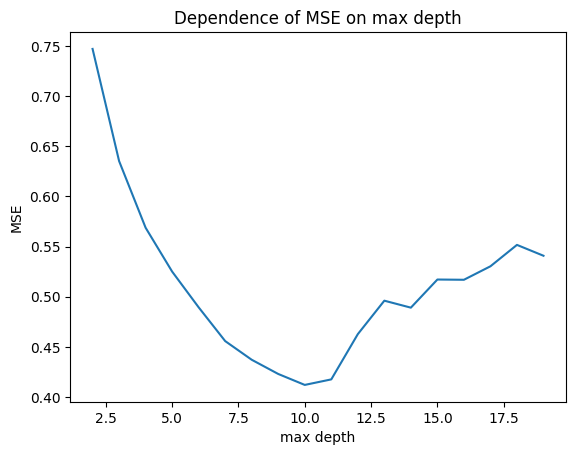

In [57]:
max_depth_array = range(2, 20)
mse_array = []

for max_depth in max_depth_array:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))

plt.plot(max_depth_array, mse_array)
plt.title("Dependence of MSE on max depth")
plt.xlabel("max depth")
plt.ylabel("MSE");

In [58]:
max_depth_array[np.argmin(mse_array)]

10

In [59]:
dt = DecisionTreeRegressor(max_depth=10, random_state=13)
dt.fit(X_train, y_train)

pd.DataFrame(
    {"feature": california_X.columns, "importance": dt.feature_importances_}
).sort_values(by="importance", ascending=False).reset_index(drop=True)

,feature,importance
0,MedInc,0.595851
1,AveOccup,0.135294
2,Latitude,0.080712
3,Longitude,0.079969
4,HouseAge,0.050374
5,AveRooms,0.033498
6,AveBedrms,0.014421
7,Population,0.009881
